# Explore here

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import requests
from sklearn.preprocessing import StandardScaler

In [4]:

url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
response = requests.get(url)

if response.status_code == 200:
    with open('/workspaces/Finarosalina__USA_demo_machine-learning-python-template/data/raw/demographic_health_data.csv', 'wb') as file:
        file.write(response.content)
    print("Archivo descargado correctamente!")
else:
    print(f"Hubo un problema al descargar el archivo: {response.status_code}")


Archivo descargado correctamente!


In [5]:
ds=pd.read_csv('/workspaces/Finarosalina__USA_demo_machine-learning-python-template/data/raw/demographic_health_data.csv')


In [6]:
pd.set_option('display.max_columns', None)
ds.head(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [7]:
ds.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [8]:
ds.shape

(3140, 108)

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [10]:
# Verificar si hay filas duplicadas
duplicados = ds.duplicated()
print(ds[duplicados])

Empty DataFrame
Columns: [fips, TOT_POP, 0-9, 0-9 y/o % of total pop, 19-Oct, 10-19 y/o % of total pop, 20-29, 20-29 y/o % of total pop, 30-39, 30-39 y/o % of total pop, 40-49, 40-49 y/o % of total pop, 50-59, 50-59 y/o % of total pop, 60-69, 60-69 y/o % of total pop, 70-79, 70-79 y/o % of total pop, 80+, 80+ y/o % of total pop, White-alone pop, % White-alone, Black-alone pop, % Black-alone, Native American/American Indian-alone pop, % NA/AI-alone, Asian-alone pop, % Asian-alone, Hawaiian/Pacific Islander-alone pop, % Hawaiian/PI-alone, Two or more races pop, % Two or more races, POP_ESTIMATE_2018, N_POP_CHG_2018, GQ_ESTIMATES_2018, R_birth_2018, R_death_2018, R_NATURAL_INC_2018, R_INTERNATIONAL_MIG_2018, R_DOMESTIC_MIG_2018, R_NET_MIG_2018, Less than a high school diploma 2014-18, High school diploma only 2014-18, Some college or associate's degree 2014-18, Bachelor's degree or higher 2014-18, Percent of adults with less than a high school diploma 2014-18, Percent of adults with a hig

In [11]:
ds.isnull().sum().sort_values(ascending=False).head(20)


fips                        0
TOT_POP                     0
0-9                         0
0-9 y/o % of total pop      0
19-Oct                      0
10-19 y/o % of total pop    0
20-29                       0
20-29 y/o % of total pop    0
30-39                       0
30-39 y/o % of total pop    0
40-49                       0
40-49 y/o % of total pop    0
50-59                       0
50-59 y/o % of total pop    0
60-69                       0
60-69 y/o % of total pop    0
70-79                       0
70-79 y/o % of total pop    0
80+                         0
80+ y/o % of total pop      0
dtype: int64

In [12]:
for col in ds.select_dtypes(include='object').columns:
    print(f"{col}:\n", ds[col].value_counts(), "\n")


COUNTY_NAME:
 COUNTY_NAME
Washington    31
Jefferson     26
Lincoln       24
Franklin      24
Jackson       24
              ..
Vilas          1
Washburn       1
Waukesha       1
Waupaca        1
Waushara       1
Name: count, Length: 1841, dtype: int64 

STATE_NAME:
 STATE_NAME
Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Louisiana                64
Colorado                 64
New York             

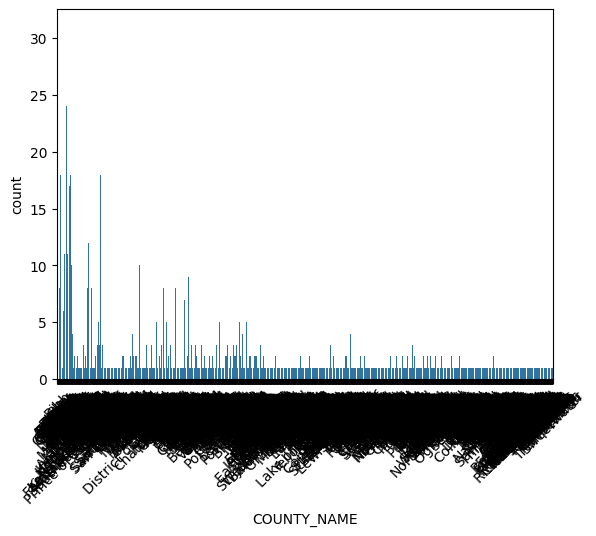

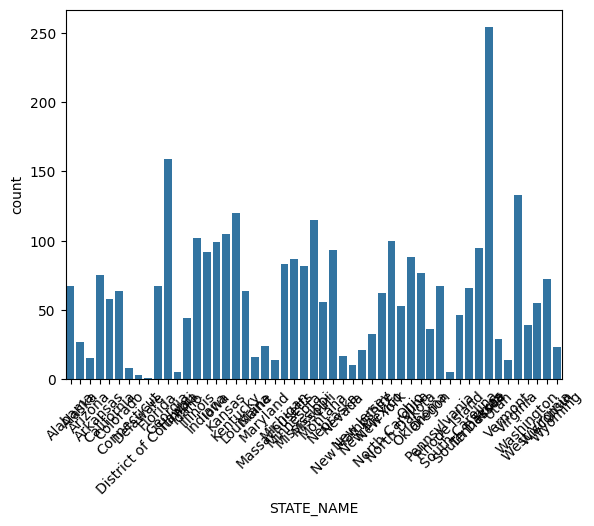

In [13]:
# categóricas : 'COUNTY_NAME', 'STATE_NAME'
sns.countplot(data=ds, x='COUNTY_NAME')
plt.xticks(rotation=45)
plt.show()
sns.countplot(data=ds, x='STATE_NAME')
plt.xticks(rotation=45)
plt.show()

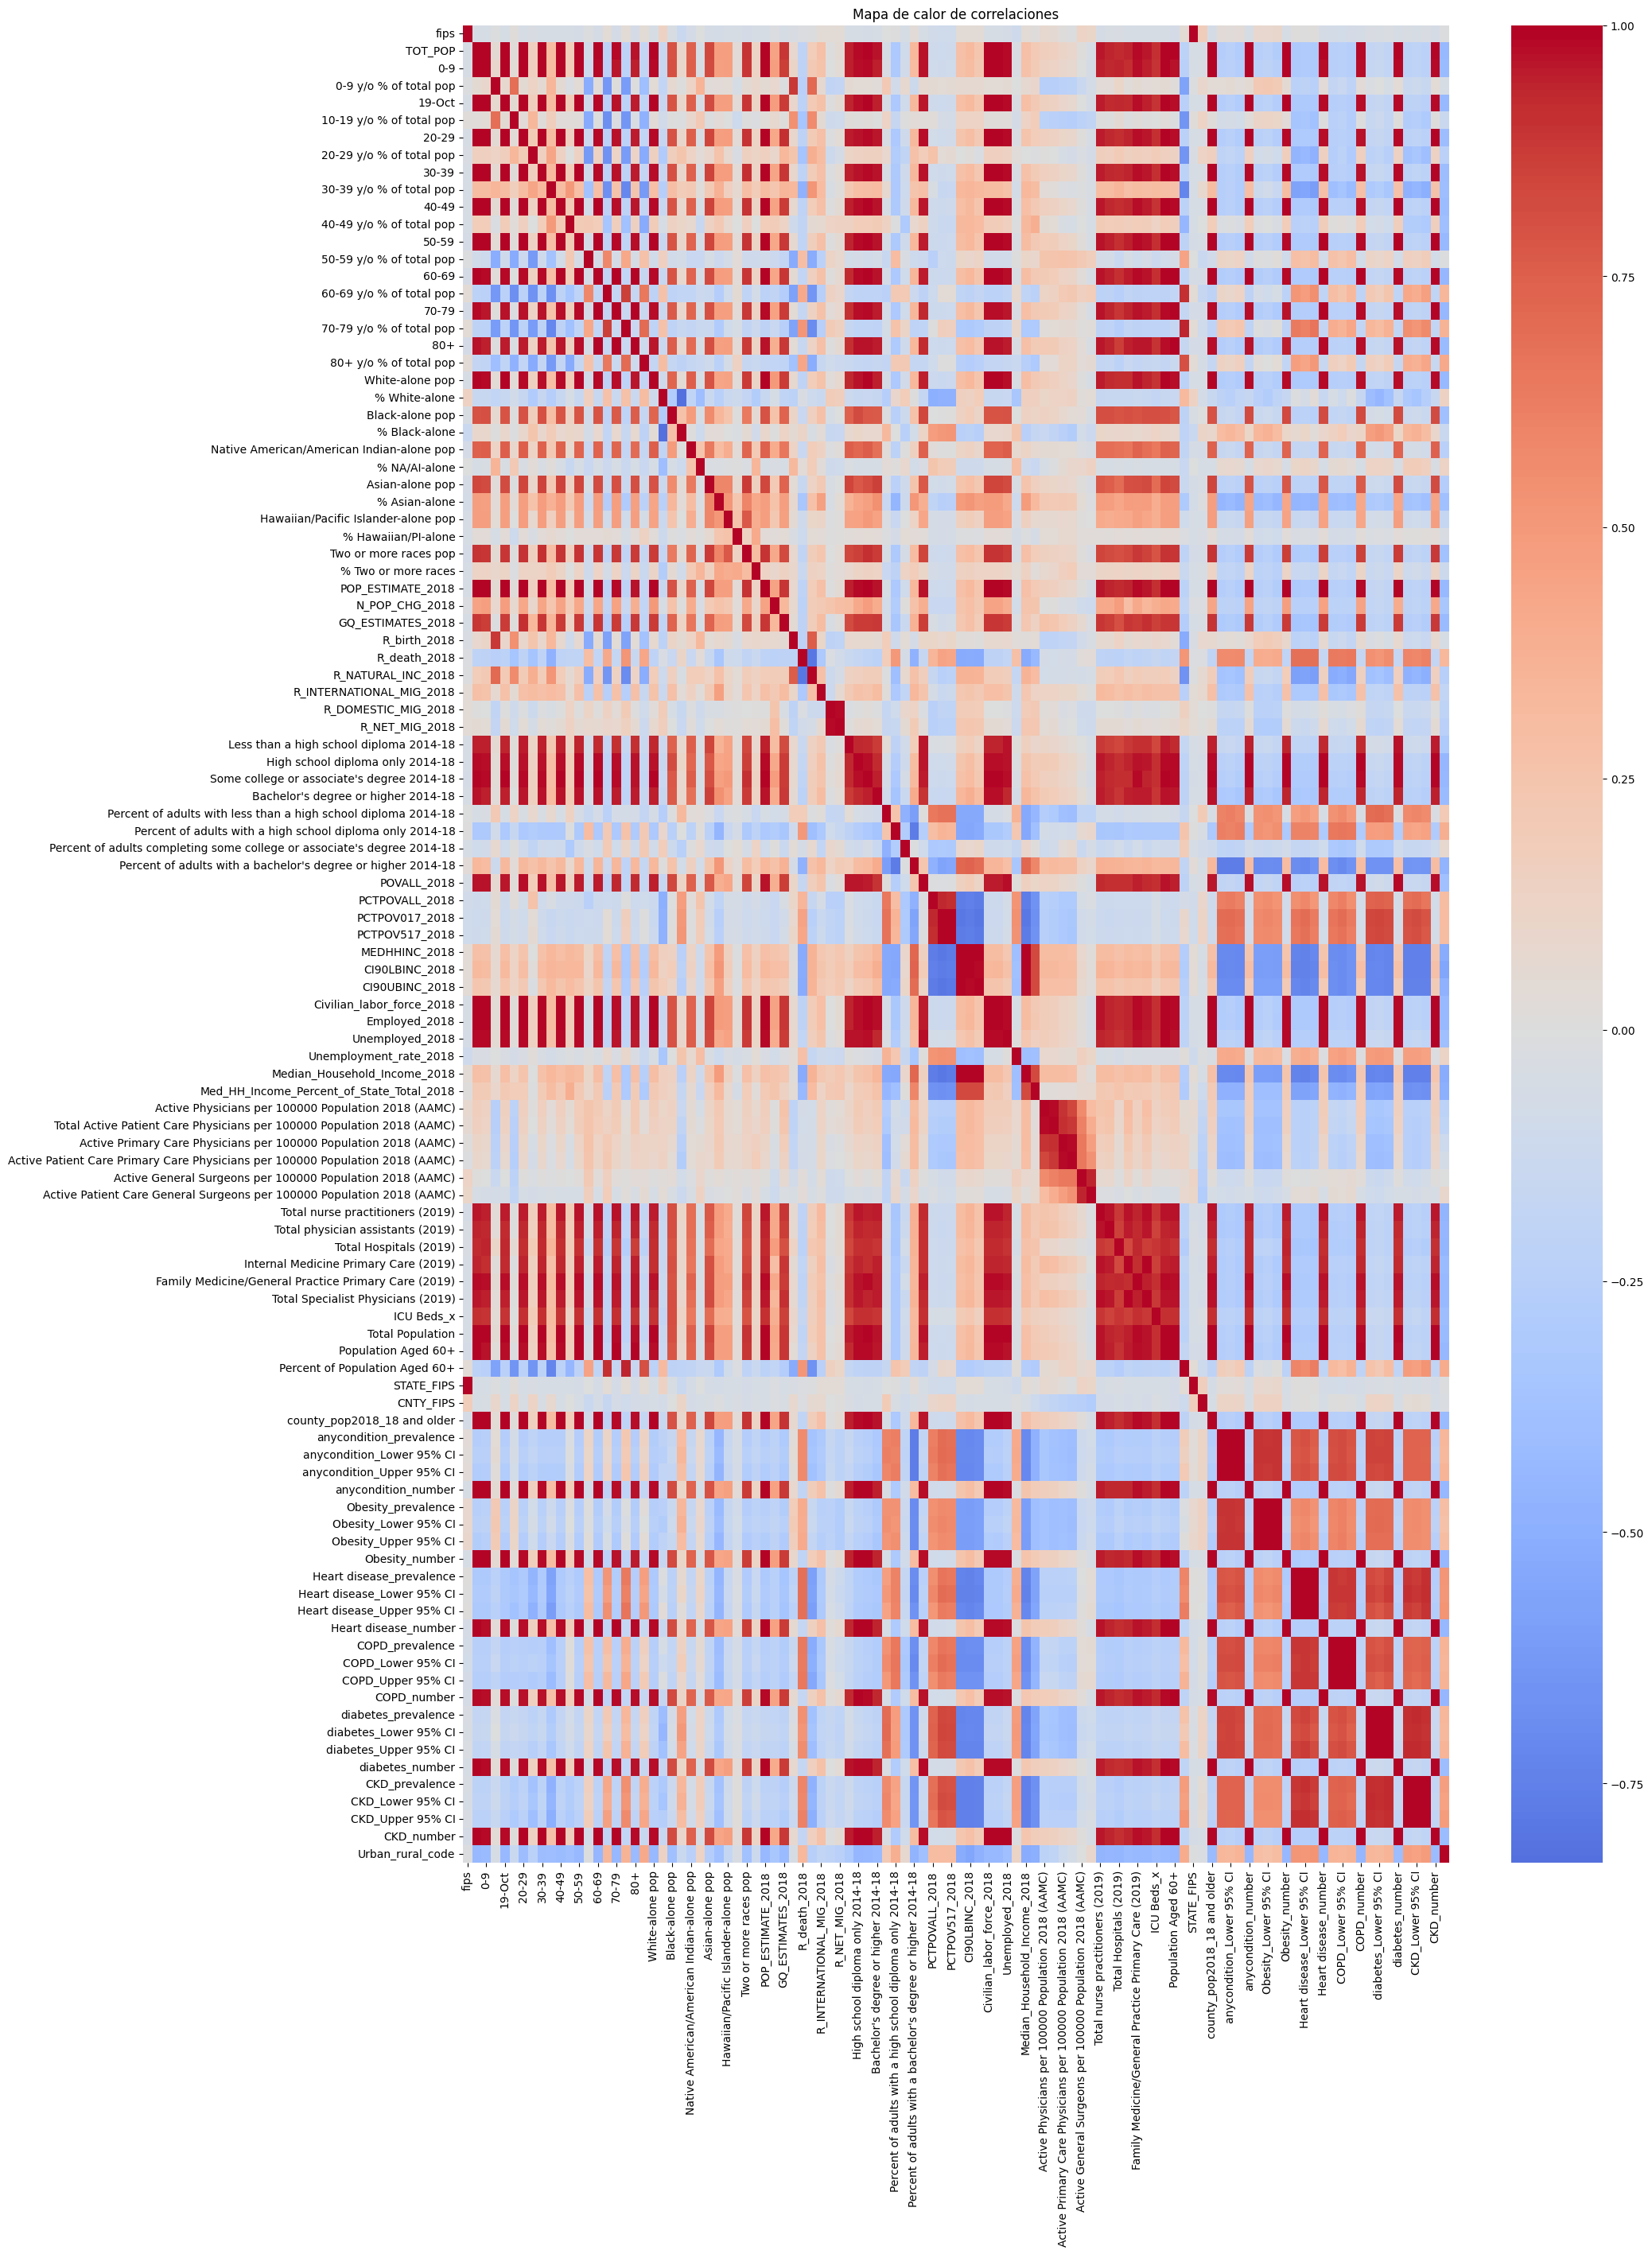

In [14]:
corr = ds.corr(numeric_only=True)

plt.figure(figsize=(20,30))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Mapa de calor de correlaciones")
plt.show()


no tiene sentido tratar de graficar todas las variables ya que no se puede discernir. Lo mejor es tratar de reducir las variables, o directametne escalar, hacer split y ver resultados.

In [15]:
corr = ds.corr(numeric_only=True)

In [16]:

target_corr = corr["Heart disease_number"].sort_values(ascending=False)
print(target_corr.head(45))  # Las más correlacionadas positivamente


Heart disease_number                                            1.000000
COPD_number                                                     0.997023
CKD_number                                                      0.995200
anycondition_number                                             0.993327
60-69                                                           0.991934
High school diploma only 2014-18                                0.991331
Population Aged 60+                                             0.991230
70-79                                                           0.990426
diabetes_number                                                 0.989505
Obesity_number                                                  0.989187
county_pop2018_18 and older                                     0.987918
TOT_POP                                                         0.987511
POP_ESTIMATE_2018                                               0.987511
50-59                                              

In [17]:
target_corr = corr["Heart disease_number"].sort_values(ascending=False)
print(target_corr.tail(5))  # Las más correlacionadas negativamente

Obesity_Upper 95% CI                                        -0.261990
Heart disease_prevalence                                    -0.270295
Heart disease_Upper 95% CI                                  -0.276441
Percent of adults with a high school diploma only 2014-18   -0.299129
Urban_rural_code                                            -0.442019
Name: Heart disease_number, dtype: float64


despues de varios calculos, encuentro las variables mas relacionadas positiuva y negativamente

In [18]:
top_positive = target_corr.head(45)
top_negative = target_corr.tail(5)

selected_features = top_positive.index.tolist() + top_negative.index.tolist()

ds_filtrado = ds[selected_features + ["Heart disease_number"]]
ds_filtrado.shape
ds_filtrado.dtypes


Heart disease_number                                              int64
COPD_number                                                       int64
CKD_number                                                        int64
anycondition_number                                               int64
60-69                                                             int64
High school diploma only 2014-18                                  int64
Population Aged 60+                                               int64
70-79                                                             int64
diabetes_number                                                   int64
Obesity_number                                                    int64
county_pop2018_18 and older                                       int64
TOT_POP                                                           int64
POP_ESTIMATE_2018                                                 int64
50-59                                                           

In [19]:
# Verificar las columnas en ds_filtrado
print(ds_filtrado.columns)


Index(['Heart disease_number', 'COPD_number', 'CKD_number',
       'anycondition_number', '60-69', 'High school diploma only 2014-18',
       'Population Aged 60+', '70-79', 'diabetes_number', 'Obesity_number',
       'county_pop2018_18 and older', 'TOT_POP', 'POP_ESTIMATE_2018', '50-59',
       'Total Population', 'Some college or associate's degree 2014-18',
       'Civilian_labor_force_2018', 'Employed_2018', '80+', '40-49',
       'White-alone pop', '19-Oct', '0-9', '20-29', '30-39', 'Unemployed_2018',
       'Family Medicine/General Practice Primary Care (2019)', 'POVALL_2018',
       'Total nurse practitioners (2019)',
       'Total Specialist Physicians (2019)',
       'Bachelor's degree or higher 2014-18',
       'Total physician assistants (2019)',
       'Internal Medicine Primary Care (2019)',
       'Less than a high school diploma 2014-18', 'Total Hospitals (2019)',
       'ICU Beds_x', 'GQ_ESTIMATES_2018', 'Two or more races pop',
       'Black-alone pop', 'Asian-alone po

In [20]:
# Eliminar las columnas duplicadas
ds_filtrado = ds_filtrado.loc[:, ~ds_filtrado.columns.duplicated()]


In [21]:
ds_filtrado.columns

Index(['Heart disease_number', 'COPD_number', 'CKD_number',
       'anycondition_number', '60-69', 'High school diploma only 2014-18',
       'Population Aged 60+', '70-79', 'diabetes_number', 'Obesity_number',
       'county_pop2018_18 and older', 'TOT_POP', 'POP_ESTIMATE_2018', '50-59',
       'Total Population', 'Some college or associate's degree 2014-18',
       'Civilian_labor_force_2018', 'Employed_2018', '80+', '40-49',
       'White-alone pop', '19-Oct', '0-9', '20-29', '30-39', 'Unemployed_2018',
       'Family Medicine/General Practice Primary Care (2019)', 'POVALL_2018',
       'Total nurse practitioners (2019)',
       'Total Specialist Physicians (2019)',
       'Bachelor's degree or higher 2014-18',
       'Total physician assistants (2019)',
       'Internal Medicine Primary Care (2019)',
       'Less than a high school diploma 2014-18', 'Total Hospitals (2019)',
       'ICU Beds_x', 'GQ_ESTIMATES_2018', 'Two or more races pop',
       'Black-alone pop', 'Asian-alone po

In [22]:
ds_filtrado.head()


,Heart disease_number,COPD_number,CKD_number,anycondition_number,60-69,High school diploma only 2014-18,Population Aged 60+,70-79,diabetes_number,Obesity_number,county_pop2018_18 and older,TOT_POP,POP_ESTIMATE_2018,50-59,Total Population,Some college or associate's degree 2014-18,Civilian_labor_force_2018,Employed_2018,80+,40-49,White-alone pop,19-Oct,0-9,20-29,30-39,Unemployed_2018,Family Medicine/General Practice Primary Care (2019),POVALL_2018,Total nurse practitioners (2019),Total Specialist Physicians (2019),Bachelor's degree or higher 2014-18,Total physician assistants (2019),Internal Medicine Primary Care (2019),Less than a high school diploma 2014-18,Total Hospitals (2019),ICU Beds_x,GQ_ESTIMATES_2018,Two or more races pop,Black-alone pop,Asian-alone pop,Native American/American Indian-alone pop,N_POP_CHG_2018,Hawaiian/Pacific Islander-alone pop,% Asian-alone,Percent of adults with a bachelor's degree or higher 2014-18,Obesity_Upper 95% CI,Heart disease_prevalence,Heart disease_Upper 95% CI,Percent of adults with a high school diploma only 2014-18,Urban_rural_code
0,3345,3644,1326,20181,5826,12119,10523,4050,5462,15193,42438,55601,55601,7738,55036,10552,25957,25015,2014,7582,42660,7637,6787,6878,7089,942,21.249061,7587,28.859137,72.142154,10291,6.085786,25.992561,4204,1.148905,6,455,1016,10915,681,267,158,62,1.224798,27.7,37.3,7.9,8.7,32.6,3
1,13414,14692,5479,68790,29932,40579,53519,20936,20520,50761,170912,218022,218022,29986,203360,46025,93849,90456,9368,27338,190301,26913,24757,23579,25213,3393,83.321572,21069,113.162114,282.882982,46075,23.863512,101.921730,14310,4.505074,51,2190,3891,19492,2508,1684,5403,146,1.150343,31.3,31.0,7.8,8.7,27.6,4
2,2159,2373,887,11325,3076,6486,6150,2244,3870,8013,19689,24881,24881,3278,26201,4566,8373,7940,1048,3074,12209,2960,2732,3268,3201,433,9.508784,6788,12.914231,32.283033,2220,2.723340,11.631462,4901,0.514126,5,2820,307,12042,113,164,-277,46,0.454162,12.2,41.9,11.0,11.8,35.7,6
3,1533,1789,595,9190,2545,7471,4773,1723,2511,6894,17813,22400,22400,3115,22580,3846,8661,8317,785,3038,17211,2596,2456,3029,3113,344,8.560619,4400,11.626493,29.063942,1813,2.451783,10.471635,2650,0.462860,0,2151,242,4770,53,98,-155,26,0.236607,11.5,40.2,8.6,9.3,47.3,2
4,4101,4661,1507,20584,6965,13489,13600,4931,6017,15112,44448,57840,57840,7844,57667,13267,25006,24128,2335,7474,55456,7570,7095,6742,6884,878,22.104740,7527,30.021267,75.047251,5010,6.330854,27.039257,7861,1.195171,6,489,801,950,185,378,13,70,0.319848,12.6,35.5,9.2,10.1,34.0,2


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = ds_filtrado.drop("Heart disease_number", axis=1)
y = ds_filtrado["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
columnas = X.columns  

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=columnas)
X_test = pd.DataFrame(scaler.transform(X_test), columns=columnas)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 154759.59083145877
R²: 0.9982318337910111


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.950e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.941e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.922e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

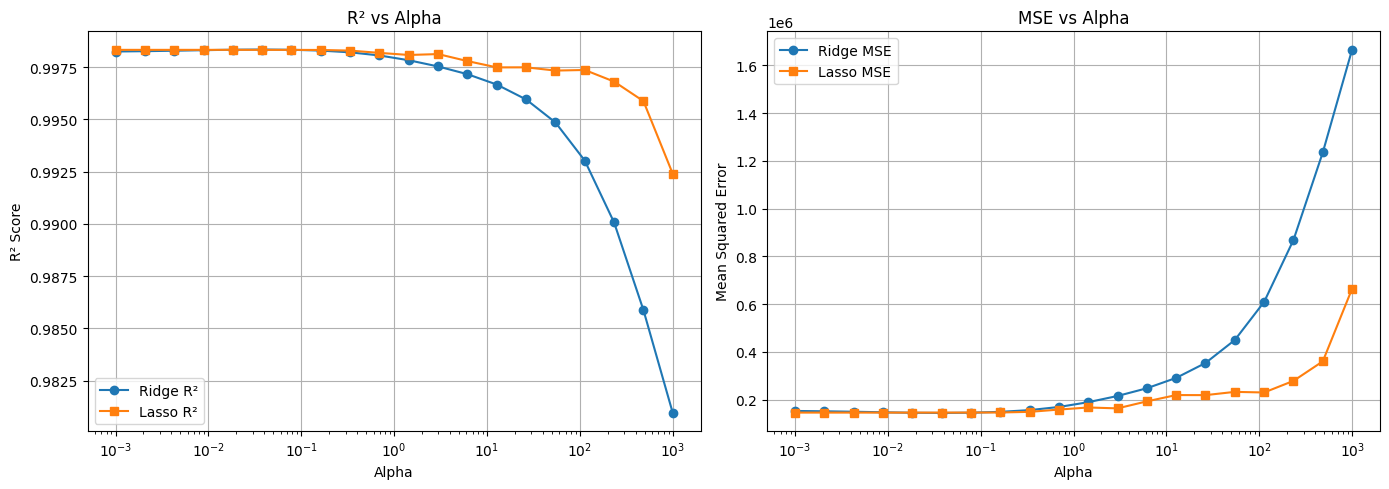

In [25]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

alphas = np.logspace(-3, 3, 20)  # De 0.001 a 1000

ridge_r2 = []
lasso_r2 = []
ridge_mse = []
lasso_mse = []

for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_r2.append(r2_score(y_test, y_pred_ridge))
    ridge_mse.append(mean_squared_error(y_test, y_pred_ridge))

    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_r2.append(r2_score(y_test, y_pred_lasso))
    lasso_mse.append(mean_squared_error(y_test, y_pred_lasso))

# Gráficas
plt.figure(figsize=(14, 5))

# R²
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_r2, label='Ridge R²', marker='o')
plt.plot(alphas, lasso_r2, label='Lasso R²', marker='s')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² vs Alpha')
plt.legend()
plt.grid(True)

# MSE
plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_mse, label='Ridge MSE', marker='o')
plt.plot(alphas, lasso_mse, label='Lasso MSE', marker='s')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


a la vista de los graficos selecciono alpha=0.1

Utilizo el modelo de Ridge, porque me parece más acertado para ese caso queel Lasso, con valores de alpha =<0.1.

In [26]:
from sklearn.linear_model import Ridge

ridge_final = Ridge(alpha=0.1)
ridge_final.fit(X_train, y_train)

y_pred_ridge = ridge_final.predict(X_test)

print("R² Ridge:", r2_score(y_test, y_pred_ridge))
print("MSE Ridge:", mean_squared_error(y_test, y_pred_ridge))


R² Ridge: 0.9983267701833219
MSE Ridge: 146450.237811166


In [27]:
print(X_train.shape)  # Verifica las dimensiones de X_train
print(ridge_final.coef_.shape)  # Verifica las dimensiones de los coeficientes


(2512, 49)
(49,)


In [28]:
ridge_coef = pd.Series(ridge_final.coef_, index=X_train.columns)

print("Coeficientes Ridge:")
print(ridge_coef)


Coeficientes Ridge:
COPD_number                                                     6305.687630
CKD_number                                                      6732.615902
anycondition_number                                            -1708.514257
60-69                                                          -1506.061349
High school diploma only 2014-18                                 482.394591
Population Aged 60+                                             3591.854581
70-79                                                           1274.548652
diabetes_number                                                 2453.000674
Obesity_number                                                  3146.913038
county_pop2018_18 and older                                     1054.883350
TOT_POP                                                          388.217545
POP_ESTIMATE_2018                                                388.217545
50-59                                                           3379

In [29]:
print("Intercepto del modelo Ridge:", ridge_final.intercept_)


Intercepto del modelo Ridge: 5840.974124203822


In [31]:
ds_filtrado.to_csv('/workspaces/Finarosalina__USA_demo_machine-learning-python-template/data/processed/ds_filtrado.csv', index=False)

In [32]:
# Guardar conjuntos de entrenamiento y prueba
X_train.to_csv('/workspaces/Finarosalina__USA_demo_machine-learning-python-template/data/processed/X_train.csv', index=False)
X_test.to_csv('/workspaces/Finarosalina__USA_demo_machine-learning-python-template/data/processed/X_test.csv', index=False)
y_train.to_csv('/workspaces/Finarosalina__USA_demo_machine-learning-python-template/data/processed/y_train.csv', index=False)
y_test.to_csv('/workspaces/Finarosalina__USA_demo_machine-learning-python-template/data/processed/y_test.csv', index=False)


In [ ]:
import json

notebook_path = '/workspaces/Finarosalina__USA_demo_machine-learning-python-template/src/explore.ipynb'
with open(notebook_path, 'r') as notebook_file:
    notebook_content = json.load(notebook_file)

python_script_path = '/workspaces/Finarosalina__USA_demo_machine-learning-python-template/src/app.py'
with open(python_script_path, 'w') as app_file:
    
    for cell in notebook_content['cells']:
        
        if cell['cell_type'] == 'code':
            
            code = ''.join(cell['source'])
            app_file.write(code + '\n\n') 

